#Project: "A Statistical and Visual Study of Unemployment in India"

Project Summary:

This project focuses on analyzing and visualizing the unemployment trends in India using real-world data.
The dataset contains information about unemployment rates, estimated employment, and labor participation across different regions and time periods.
By using Python libraries like Pandas, NumPy, Matplotlib, Seaborn, and Plotly Express, this project performs both statistical analysis and interactive data visualization to uncover meaningful insights.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')


In [ ]:
df.describe()

,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


#1. Region-wise Unemployment Rate

In [ ]:
fig = px.bar(df,
             x='Region',
             y='Estimated_Unemployment_Rate_(%)',
             color='Region',
             title='Region-wise Unemployment Rate (Interactive)',
             hover_data=['Estimated_Labour_Participation_Rate_(%)'])
fig.update_layout(xaxis_tickangle=-45)
fig.show()


/tmp/ipython-input-4294692686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df, palette='viridis',legend=False)


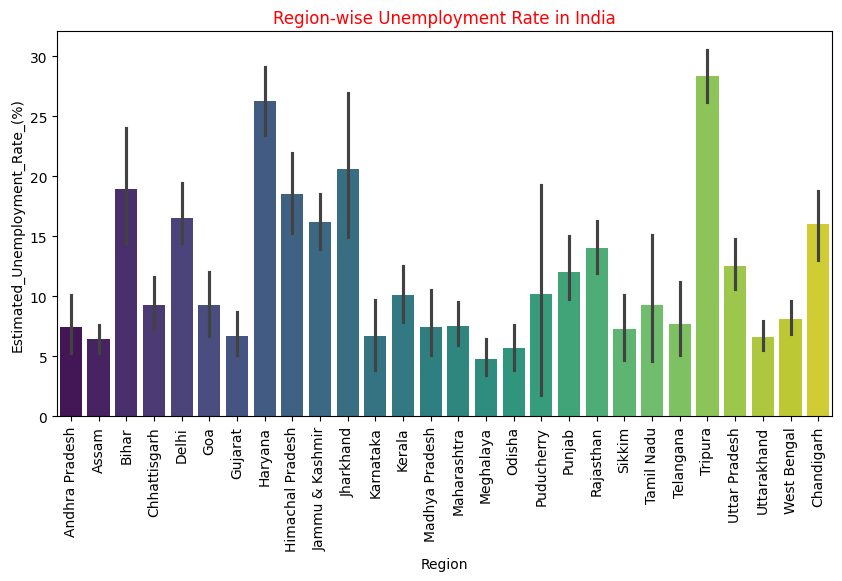

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df, palette='viridis',legend=False)
plt.xticks(rotation=90)
plt.title('Region-wise Unemployment Rate in India',color='red')
plt.show()


#2. *Months* wise Estimated Unemployment rate(%)

In [ ]:
fig = px.line(df,
              x='Date',
              y='Estimated_Unemployment_Rate_(%)',
              color='Region',
              title='Unemployment Rate Over Time by Region')
fig.show()


/tmp/ipython-input-2689363671.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df,palette='dark' )


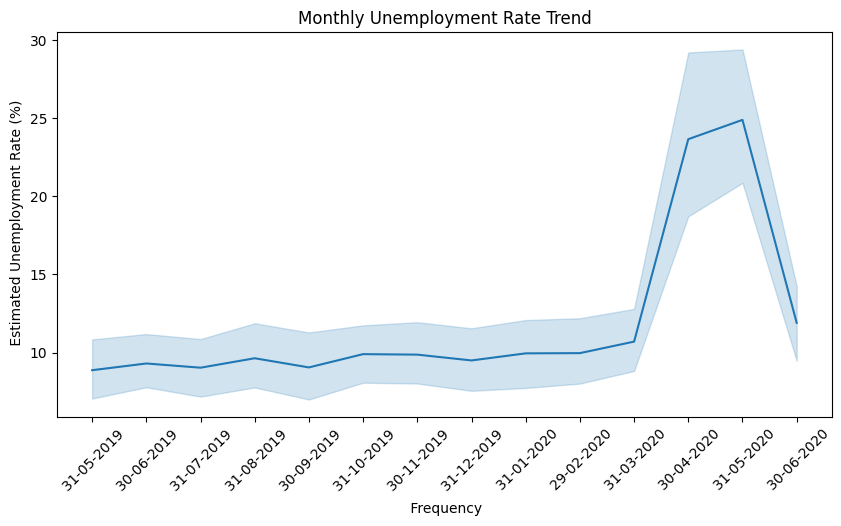

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df,palette='dark' )
plt.title('Monthly Unemployment Rate Trend')
plt.xlabel(' Frequency')
plt.ylabel(' Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


#3. State vs Labour participation rate(%)

In [ ]:
fig = px.scatter(df,
                 x='Estimated_Labour_Participation_Rate_(%)',
                 y='Estimated_Unemployment_Rate_(%)',
                 color='Region',
                 size='Estimated_Employed',
                 hover_name='Region',
                 title='Labour Participation vs Unemployment Rate')
fig.show()


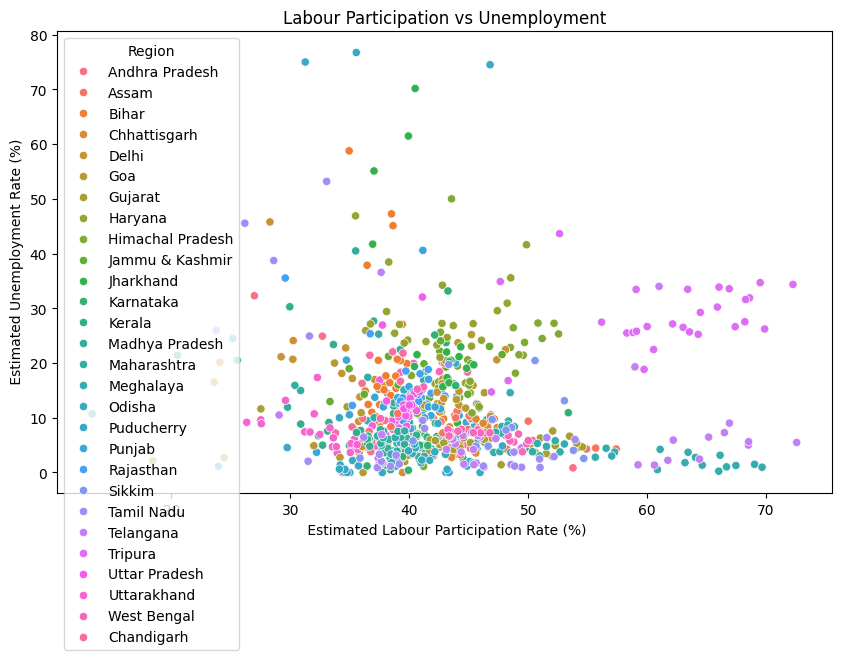

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=' Estimated Labour Participation Rate (%)',
                y=' Estimated Unemployment Rate (%)',
                hue='Region', data=df)
plt.title('Labour Participation vs Unemployment')
plt.show()


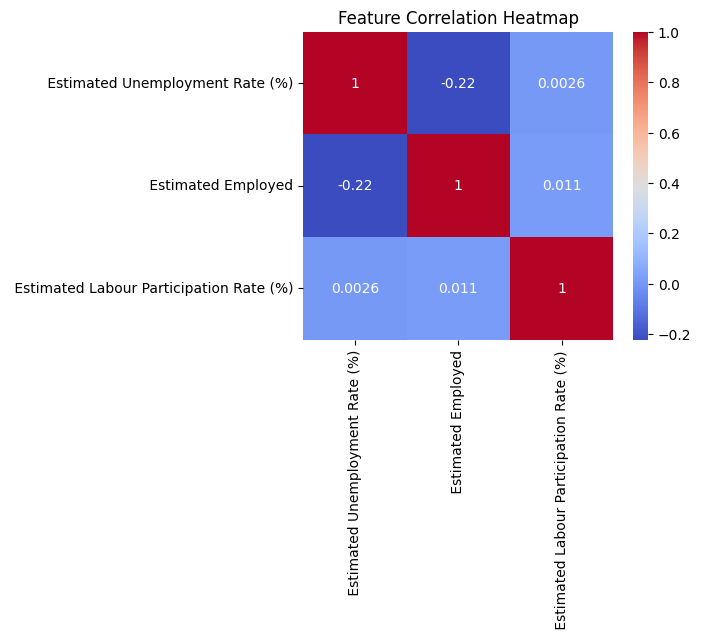

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


#Top 10 States with Highest Unemployment

/tmp/ipython-input-3342082850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index,palette='muted')


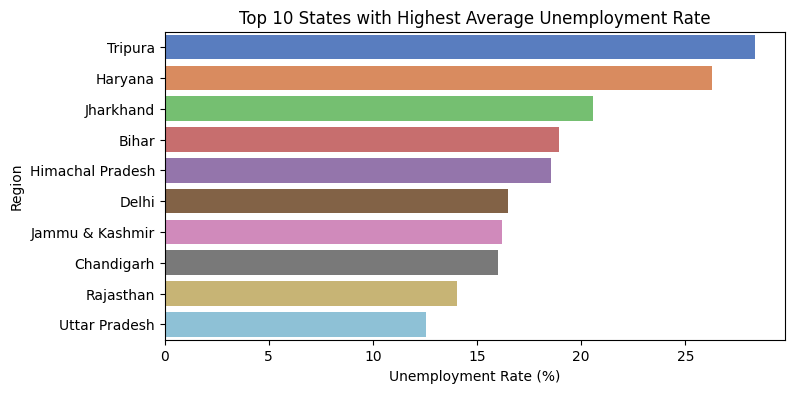

In [ ]:
top_states = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_states.values, y=top_states.index,palette='muted')
plt.title('Top 10 States with Highest Average Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.show()
